Построение фазового портрета

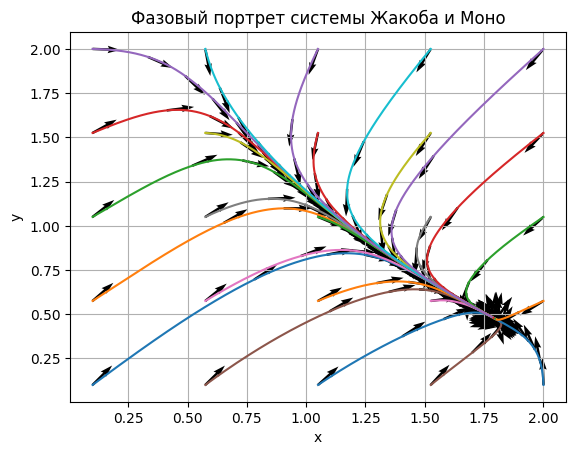

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Определение параметров системы
a1, a2 = 2.0, 1.0
b1, b2 = 2.0, 1.0
q1, q2 = 0.5, 0.5
m = 2 # 10 - две особые точки

# Определение системы уравнений
def model(t, vars):
    x, y = vars
    dxdt = a1 / (b1 + y**m) - q1 * x
    dydt = a2 / (b2 + x**m) - q2 * y
    return [dxdt, dydt]

# Задаем начальные условия
x0 = np.linspace(0.1, 2.0, 5)
y0 = np.linspace(0.1, 2.0, 5)

# Решаем систему для каждого набора начальных условий
t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

fig, ax = plt.subplots()

for x_init in x0:
    for y_init in y0:
        sol = solve_ivp(model, t_span, [x_init, y_init], t_eval=t_eval)
        ax.plot(sol.y[0], sol.y[1])

        # Добавление стрелок вдоль траектории
        n_arrows = 20  # количество стрелок на каждой траектории
        indices = np.linspace(0, len(sol.t) - 2, n_arrows).astype(int)

        for idx in indices:
            x_arrow = sol.y[0][idx]
            y_arrow = sol.y[1][idx]
            dx_arrow = sol.y[0][idx + 1] - sol.y[0][idx]
            dy_arrow = sol.y[1][idx + 1] - sol.y[1][idx]
            ax.quiver(x_arrow, y_arrow, dx_arrow, dy_arrow, width=0.005)

# Настройка графика
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Фазовый портрет системы Жакоба и Моно')
plt.grid(True)
plt.show()

Определение особых точек

In [52]:
from scipy.optimize import fsolve
import sympy as sp

# Уравнения для нахождения особых точек
def equilibrium(vars):
    x, y = vars
    eq1 = a1 / (b1 + y**m) - q1 * x
    eq2 = a2 / (b2 + x**m) - q2 * y
    return [eq1, eq2]

# Ищем особые точки, используя разные начальные приближения
initial_guesses = [
    [0.1, 0.1],
    [0.5, 0.5],
    [1.0, 1.0],
    [1.5, 1.5],
    [2.0, 2.0],
]

equilibrium_points = []
for guess in initial_guesses:
    eq_point = fsolve(equilibrium, guess)
    if not any(np.allclose(eq_point, pt) for pt in equilibrium_points):
        equilibrium_points.append(eq_point)

# Анализ типа особых точек с помощью Якобиана
x, y = sp.symbols('x y')
f1 = a1 / (b1 + y**m) - q1 * x
f2 = a2 / (b2 + x**m) - q2 * y

jacobian_matrix = sp.Matrix([
    [sp.diff(f1, x), sp.diff(f1, y)],
    [sp.diff(f2, x), sp.diff(f2, y)],
])

for i, pt in enumerate(equilibrium_points, 1):
    jacobian_at_point = jacobian_matrix.subs({x: pt[0], y: pt[1]})
    eigenvalues = jacobian_at_point.eigenvals()
    eigenvalues_real_parts = [sp.re(eig) for eig in eigenvalues.keys()]  # Вещественные части собственных значений

    print(f"\nОсобая точка (x = {pt[0]:.4f}, y = {pt[1]:.4f}):")

    if all(eig > 0 or eig < 0 for eig in eigenvalues_real_parts):
        print("Тип: Узел")
    elif any(eig < 0 for eig in eigenvalues_real_parts) and any(eig > 0 for eig in eigenvalues_real_parts):
        print("Тип: Седло")
    elif any(sp.im(eig) != 0 for eig in eigenvalues.keys()):
        print("Тип: Фокус")
    else:
        print("Тип: Неопределенный")


Особая точка (x = 1.7997, y = 0.4718):
Тип: Узел


1. Что такое динамическая система?

Динамическая система — это математическая модель, описывающая изменение состояния системы во времени. Состояние динамической системы характеризуется фазовыми координатами, которые принадлежат фазовому пространству. Развитие состояния системы во времени описывается системой дифференциальных уравнений, в которых производные фазовых координат по времени задаются функциями от самих фазовых координат и времени.

2. Что такое особая точка?
Особая точка — это точка в фазовом пространстве, где скорости изменения всех фазовых координат равны нулю. В такой точке система находится в состоянии равновесия. В особой точке фазовые траектории системы либо притягиваются, либо отталкиваются, либо остаются на месте, в зависимости от типа этой точки.

3. Перечислите типы невырожденных особых точек
Типы невырожденных особых точек включают:

### Узел:

Если все собственные значения матрицы Якобиана вещественные и одного знака, особая точка является узлом.
Узел может быть либо притягивающим (все собственные значения отрицательные), либо отталкивающим (все положительные).

### Седло:

Если хотя бы одно собственное значение матрицы Якобиана положительное, а другое отрицательное, особая точка является седлом.
В этом случае вдоль одного направления система притягивается к особой точке, а вдоль другого отталкивается от нее.

### Фокус:

Если собственные значения комплексные с ненулевой мнимой частью, особая точка является фокусом.
В зависимости от знака вещественной части собственных значений фокус может быть притягивающим или отталкивающим.
